In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt


In [2]:
model = load_model("/Users/princegarg/Downloads/mnist_model_001.h5")
print("Model Loaded Successfully!")


Model Loaded Successfully!


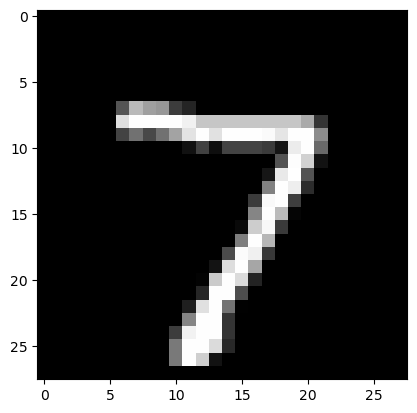

In [3]:
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train,y_train), (x_test, y_test) = mnist.load_data()

# Select a sample image for testing
sample_image = x_test[0]
plt.imshow(sample_image.squeeze(), cmap="gray")
plt.show()

# Reshape for model prediction
sample_image = np.expand_dims(sample_image, axis=0)


In [7]:
prediction = model.predict(sample_image)
predicted_label = np.argmax(prediction)

print(f"Predicted Digit: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Digit: 7


In [9]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 514,212 (1.96 MB)

 Trainable params: 511,810 (1.95 MB)

 Non-trainable params: 2,400 (9.38 KB)

 Optimizer params: 2 (12.00 B)

In [11]:
model.trainable=True
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9814 - loss: 0.0869
Model Accuracy: 98.47%


In [19]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9814 - loss: 0.0869
Model Accuracy: 98.47%


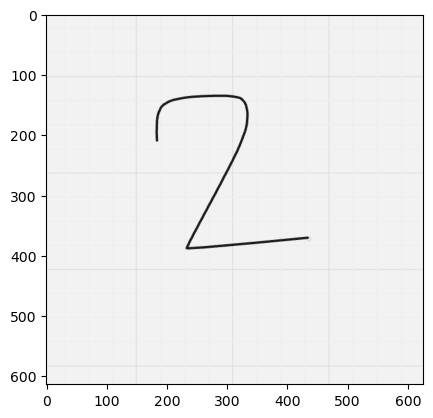

In [49]:
new_image =plt.imread("/Users/princegarg/Screenshot/a.png")
img=plt.imshow(new_image)

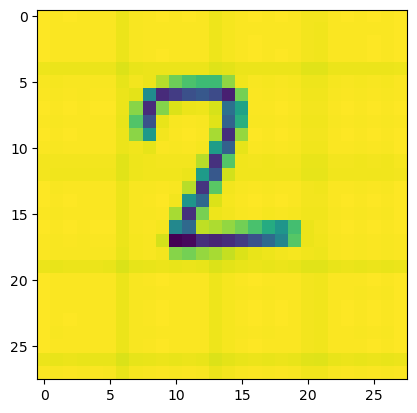

In [85]:
from skimage.transform import resize
resize_image=resize(new_image,(28,28,1))
img=plt.imshow(resize_image)

In [87]:
predictions = model.predict(np.array([resize_image]))
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[1.9588076e-06, 9.8118252e-01, 8.9221365e-05, 5.0415892e-05,
        7.1373993e-06, 1.1137973e-02, 6.4351470e-06, 7.5243646e-03,
        2.4805047e-13, 4.7334947e-10]], dtype=float32)